In [60]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

In [14]:
np.__version__

'2.1.3'

In [15]:
pd.__version__

'2.2.3'

In [16]:
matplotlib.__version__

'3.10.0'

In [17]:
sns.__version__

'0.13.2'

In [18]:
df = pd.read_csv("dados\dataset.csv")

In [19]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [20]:
#Verificar se há dados duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [21]:
#Verifica se há valores vazios
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

## Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [22]:
colunas = df.columns
print(colunas)

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')


In [23]:
city = df[df["Categoria"] == "Office Supplies"].groupby("Cidade")["Valor_Venda"].sum().idxmax()

In [24]:
city

'New York City'

## Qual o Total de Vendas Por Data do Pedido?

In [25]:
total_per_data = df.groupby("Data_Pedido")["Valor_Venda"].sum().reset_index()

In [26]:
total_per_data.head()

,Data_Pedido,Valor_Venda
0,01/01/2018,1481.8280
1,01/02/2015,468.9000
2,01/02/2017,161.9700
3,01/03/2015,2203.1510
4,01/03/2016,1642.1744


In [58]:
total_per_data["Data_Pedido"] = pd.to_datetime(total_per_data["Data_Pedido"], dayfirst = True)

(array([  31.,  212.,  396.,  577.,  761.,  943., 1127.]),
 [Text(31.0, 0, '2016-11-01'),
  Text(212.0, 0, '2018-04-06'),
  Text(396.0, 0, '2018-11-10'),
  Text(577.0, 0, '2015-07-15'),
  Text(761.0, 0, '2015-02-20'),
  Text(943.0, 0, '2015-06-24'),
  Text(1127.0, 0, '2018-12-28')])

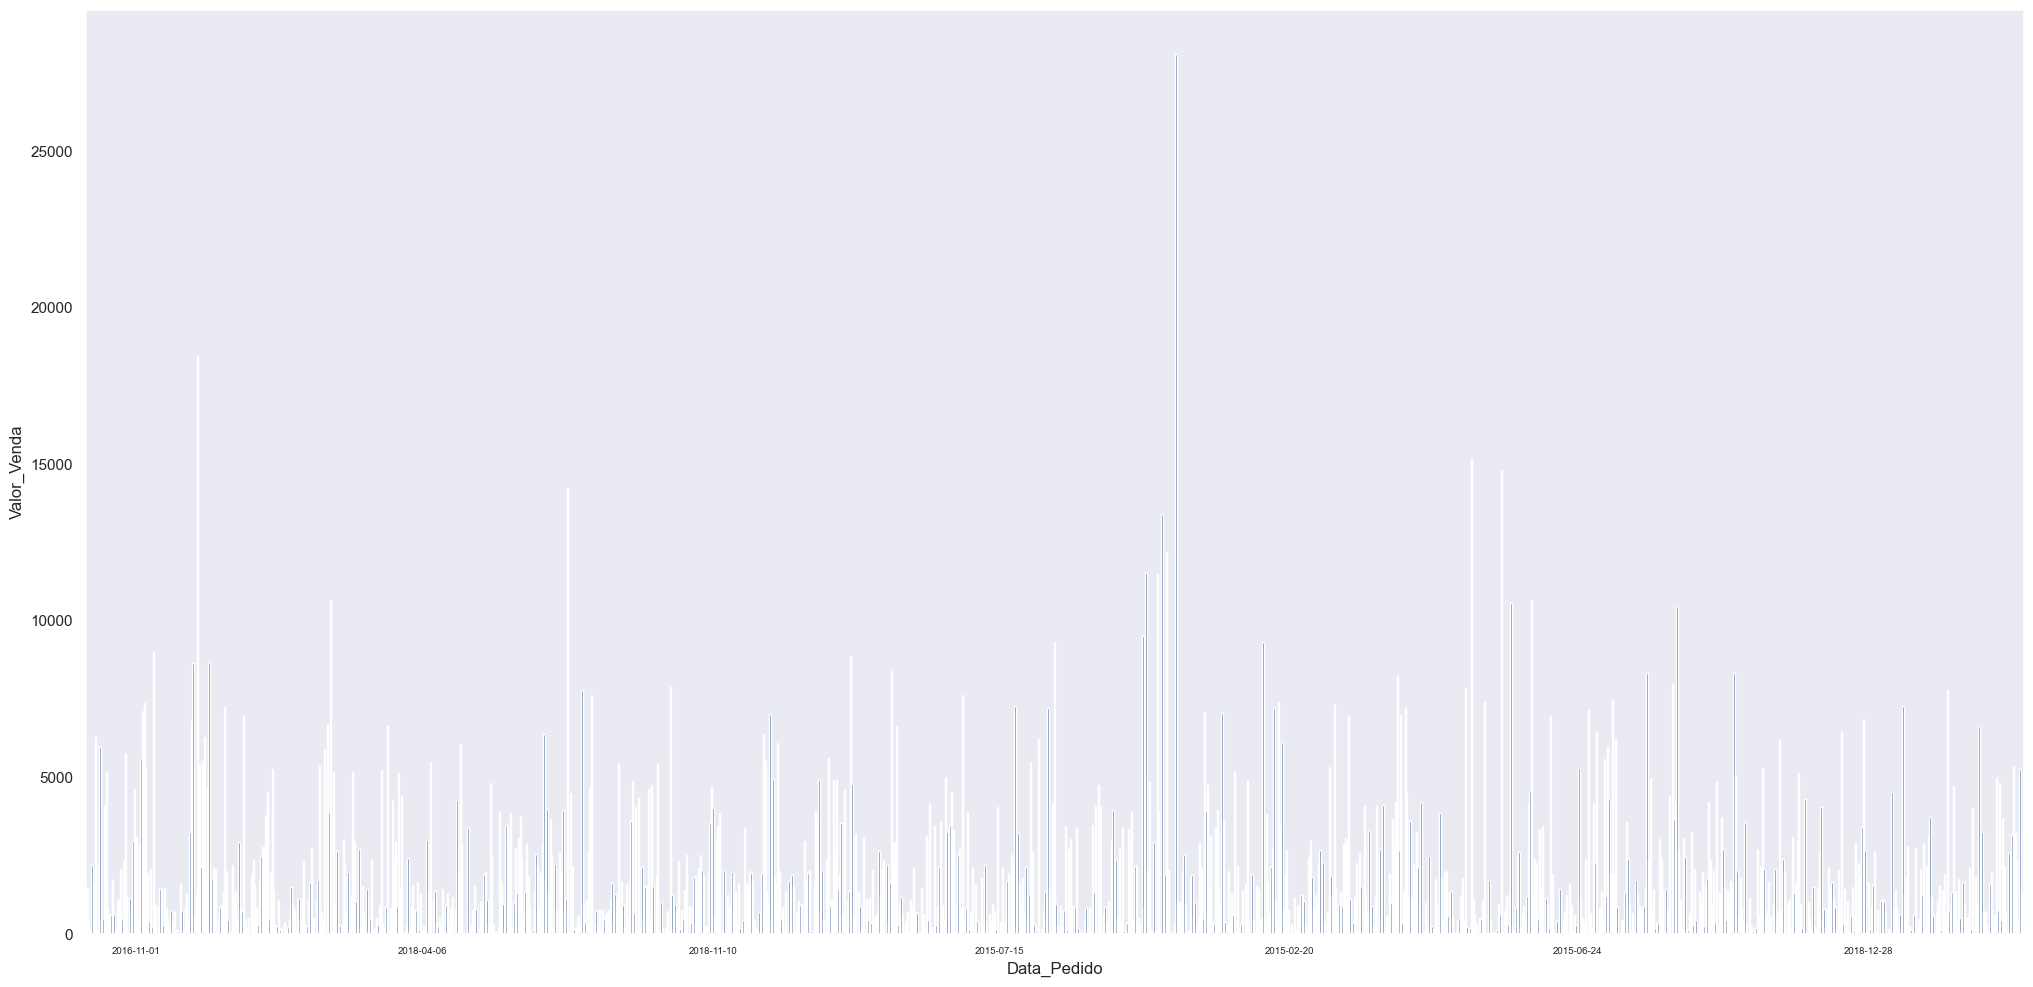

In [66]:
plt.figure(figsize = (25, 12))
sns.barplot(x = "Data_Pedido", y = "Valor_Venda", data = total_per_data)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(size='xx-small')

## Qual o Total de Vendas por Estado?

In [28]:
total_per_state = df.groupby("Estado")["Valor_Venda"].sum().reset_index()

<BarContainer object of 49 artists>

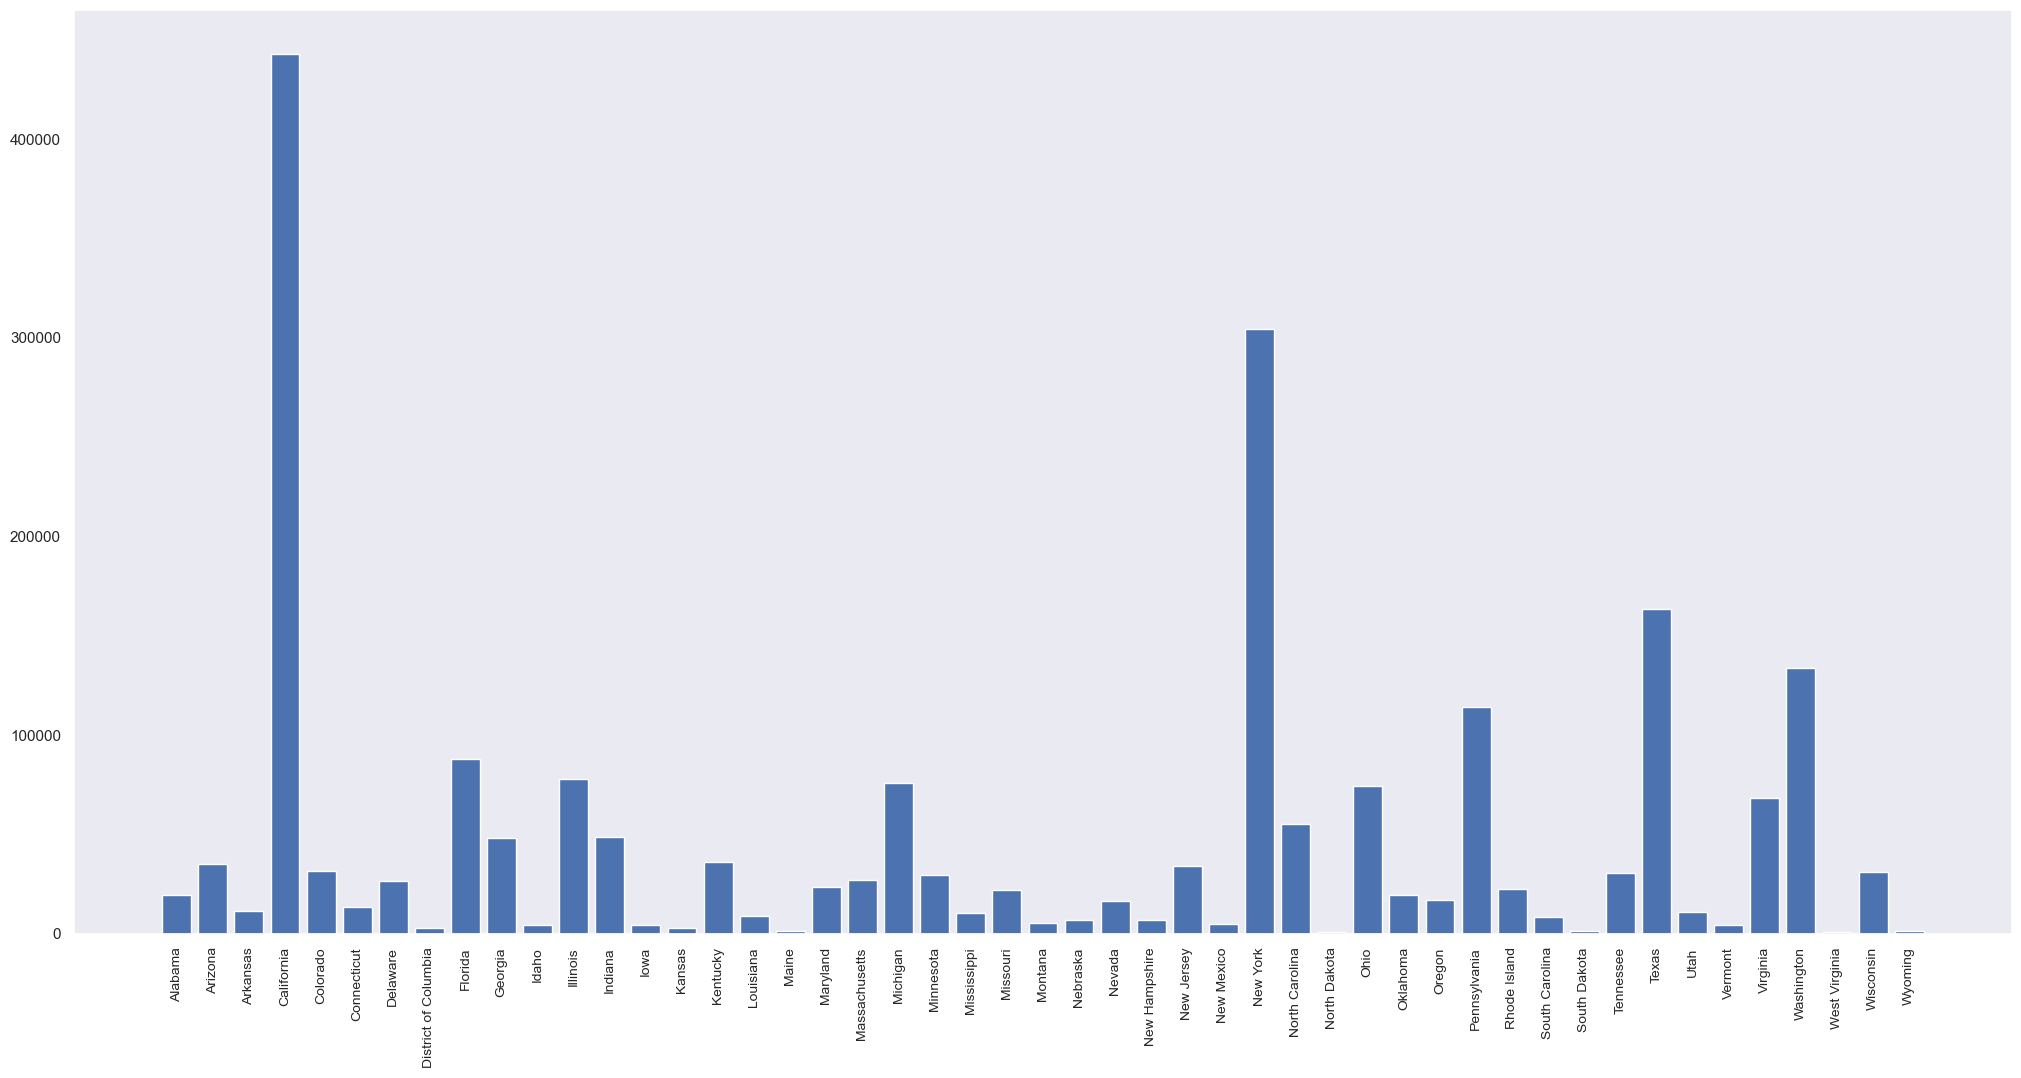

In [29]:
plt.figure(figsize = (25, 12))
plt.xticks(rotation=90, size='small')
plt.bar("Estado", "Valor_Venda", data = total_per_state)

## Quais São as 10 Cidades com Maior Total de Vendas?

In [30]:
sorted_cities = df.groupby("Cidade")["Valor_Venda"].sum().sort_values(ascending = False).reset_index()

In [31]:
top10_cities = sorted_cities.head(10)

In [32]:
top10_cities

,Cidade,Valor_Venda
0,New York City,251749.2190
1,Los Angeles,171654.6330
2,Seattle,114725.4780
3,San Francisco,107489.9520
4,Philadelphia,107197.8030
5,Houston,61590.1868
6,San Diego,47458.3790
7,Chicago,46974.3430
8,Jacksonville,44713.1830
9,Detroit,42446.9440


<BarContainer object of 10 artists>

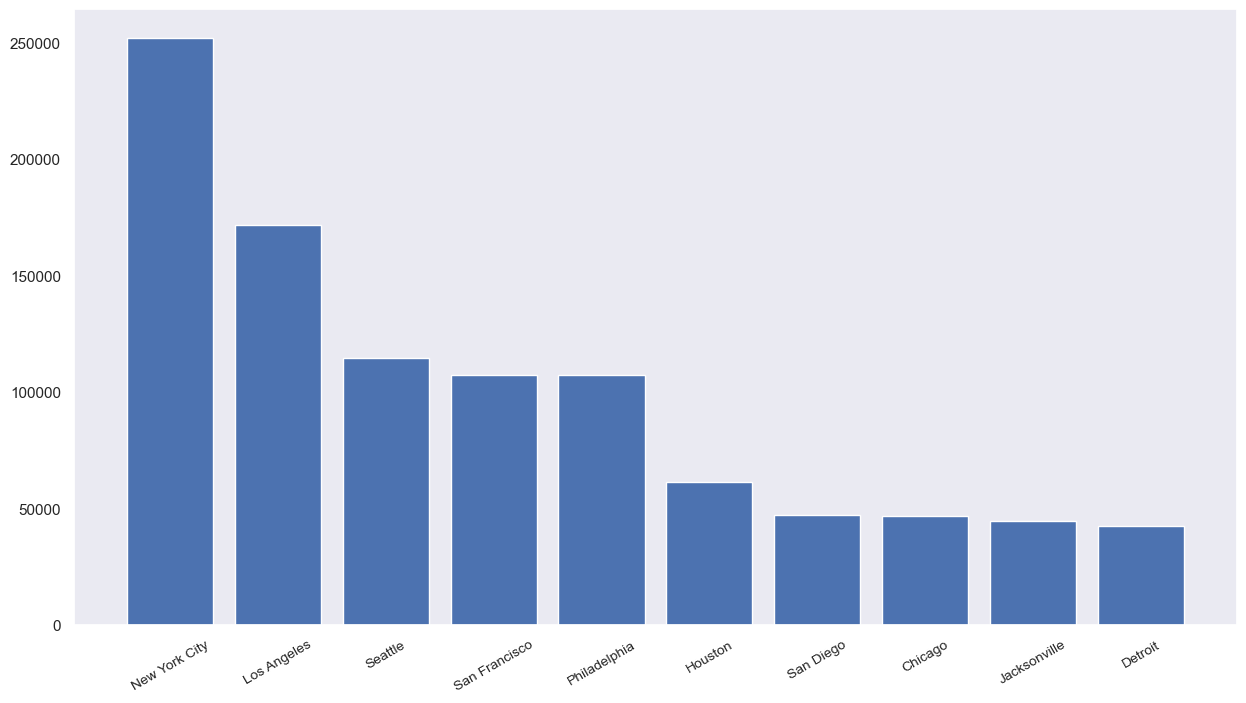

In [33]:
plt.figure(figsize = (15, 8))
plt.xticks(rotation=30, size='small')
plt.bar("Cidade", "Valor_Venda", data = top10_cities)

## Qual Segmento Teve o Maior Total de Vendas?

In [34]:
best_segment = df.groupby("Segmento")["Valor_Venda"].sum().reset_index()

In [35]:
best_segment

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [36]:
#Converter a notação científica em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' ${v:d}'.format(v = val)
    return my_format

([<matplotlib.patches.Wedge at 0x2441f7081a0>,
 [Text(-1.1996945706434106, -0.027072812353417727, 'Consumer'),
  Text(0.9254034964052409, -0.5946666030987073, 'Corporate'),
  Text(0.615393181747585, 0.9117517380617292, 'Home Office')],
 [Text(-0.6998218328753227, -0.015792473872827006, ' $1133834'),
  Text(0.5047655434937677, -0.324363601690204, ' $679232'),
  Text(0.33566900822595536, 0.4973191298518522, ' $422491')])

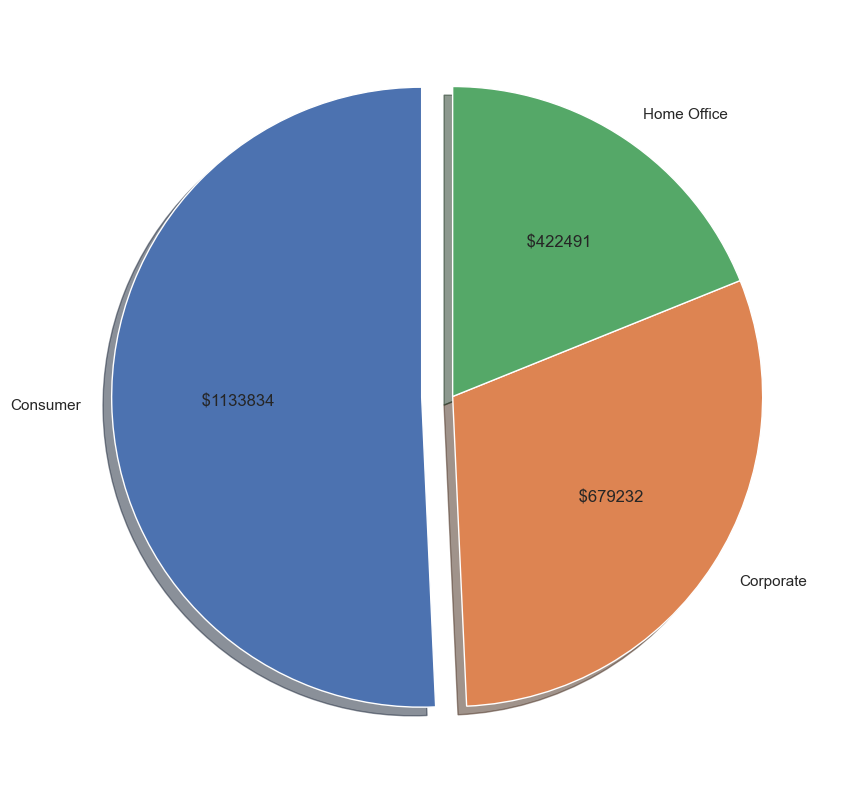

In [37]:
plt.pie(best_segment["Valor_Venda"], explode=[0.1, 0, 0], labels=best_segment["Segmento"], autopct = autopct_format(best_segment["Valor_Venda"]), shadow = True, startangle = 90)

## Qual o Total de Vendas Por Segmento e Por Ano?

In [38]:
addyear = pd.to_datetime(df["Data_Pedido"], dayfirst=True, utc=True, format="%d/%m/%Y")

In [39]:
df["Ano"] = addyear.dt.year

In [40]:
total_per_year_segment = df.groupby(["Ano", "Segmento"])["Valor_Venda"].sum()
dfys = total_per_year_segment.to_frame()
dfys

Valor_Venda
Ano  Segmento                
2015 Consumer     256719.9166
     Corporate    125819.5957
     Home Office   88229.0878
2016 Consumer     265295.2593
     Corporate    114643.1229
     Home Office   74134.1332
2017 Consumer     288459.5572
     Corporate    203266.7398
     Home Office  103639.6270
2018 Consumer     323359.6019
     Corporate    235502.7284
     Home Office  156488.5849

## Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos e gostariam de fazer uma simulação com base na regra abaixo: 
## Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
## Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
## Quantas Vendas Receberiam 15% de Desconto?

In [41]:
quant_descontos = df[df["Valor_Venda"] > 1000].count()
quant_descontos["Valor_Venda"]

np.int64(457)

## Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [42]:
mean_before = df["Valor_Venda"].mean()
mean_before

np.float64(230.4698922371134)

In [43]:
valor_venda_desconto = df[df["Valor_Venda"] > 1000]["Valor_Venda"].sum() * 0.85
valor_venda_semdesconto = df[df["Valor_Venda"] < 1000]["Valor_Venda"].sum()

In [44]:
mean_after = (valor_venda_desconto + valor_venda_semdesconto)/df.shape[0]
mean_after

np.float64(215.51038958350517)

## Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

In [45]:
addmonth = pd.to_datetime(df["Data_Pedido"], dayfirst=True, utc=True, format="%d/%m/%Y")
df["Mes"] = addmonth.dt.month

In [46]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Mes
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,11
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,11
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,6
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,10
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,10


In [47]:
mean_segment_year_month = df.groupby(["Segmento", "Ano", "Mes"])["Valor_Venda"].mean().reset_index()
dfsym = mean_segment_year_month
dfsym["Data"] = pd.to_datetime(dfsym["Ano"].astype(str) + "-" + dfsym["Mes"].astype(str) +"-01")
dfsym

,Segmento,Ano,Mes,Valor_Venda,Data
0,Consumer,2015,1,146.736787,2015-01-01
1,Consumer,2015,2,117.327926,2015-02-01
2,Consumer,2015,3,152.170564,2015-03-01
3,Consumer,2015,4,189.762750,2015-04-01
4,Consumer,2015,5,191.337439,2015-05-01
...,...,...,...,...,...
139,Home Office,2018,8,176.160606,2018-08-01
140,Home Office,2018,9,249.140597,2018-09-01
141,Home Office,2018,10,412.576597,2018-10-01
142,Home Office,2018,11,247.519423,2018-11-01


<Axes: xlabel='Data', ylabel='Valor_Venda'>

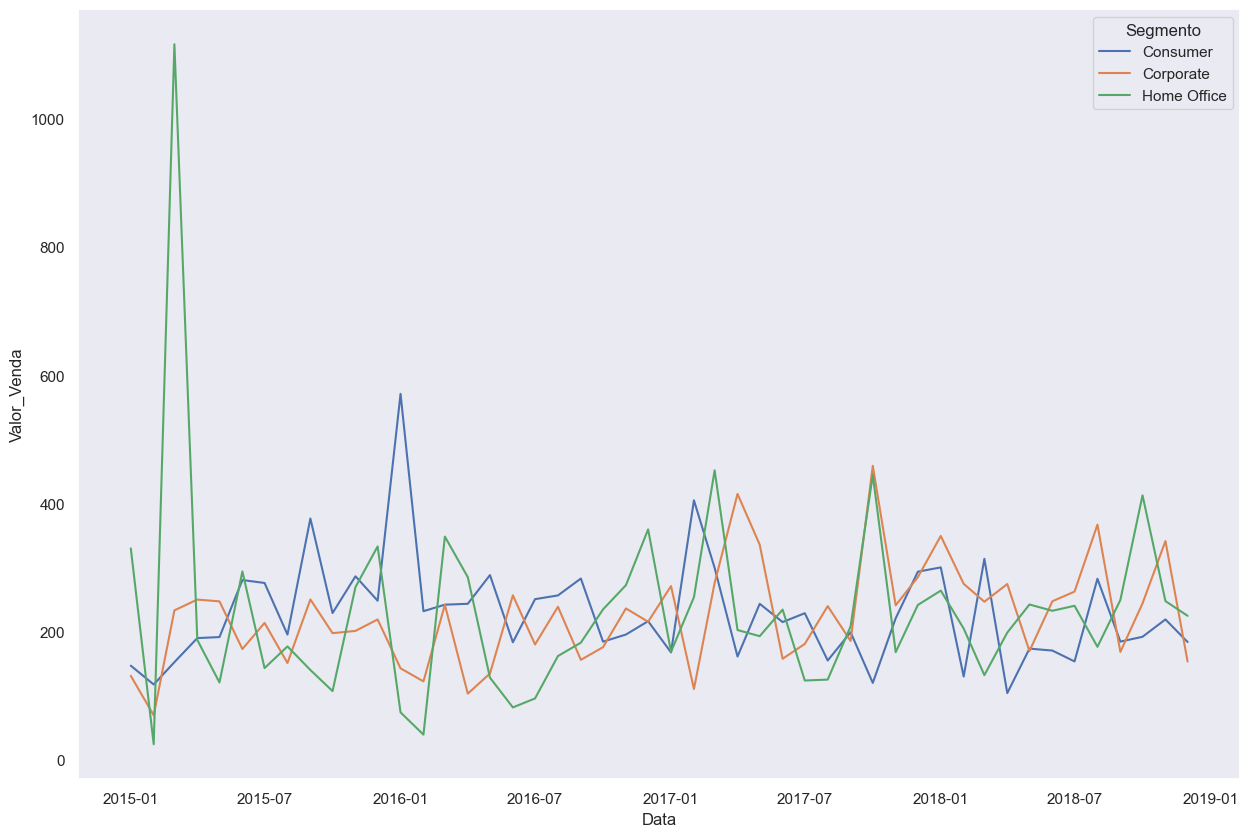

In [48]:
sns.set_theme("notebook", rc={'figure.figsize': (15,10)})
sns.set_style("dark")
sns.lineplot(data=dfsym, x="Data", y="Valor_Venda", hue="Segmento")
#relplot seaborn - gráfico de relação - linha ou dispersão

## Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?

In [49]:
top12_subcategorias = df.groupby(["Categoria", "SubCategoria"])["Valor_Venda"].sum().sort_values(ascending = False).head(12).reset_index()
top12_subcategorias

,Categoria,SubCategoria,Valor_Venda
0,Technology,Phones,325271.2940
1,Furniture,Chairs,317919.6250
2,Office Supplies,Storage,216188.3620
3,Furniture,Tables,202083.3600
4,Office Supplies,Binders,194723.3810
5,Technology,Machines,189238.6310
6,Technology,Accessories,162791.3620
7,Technology,Copiers,146248.0940
8,Furniture,Bookcases,108045.0467
9,Office Supplies,Appliances,104061.6930


In [50]:
print(sns.__version__)

0.13.2


<Axes: xlabel='SubCategoria', ylabel='Valor_Venda'>

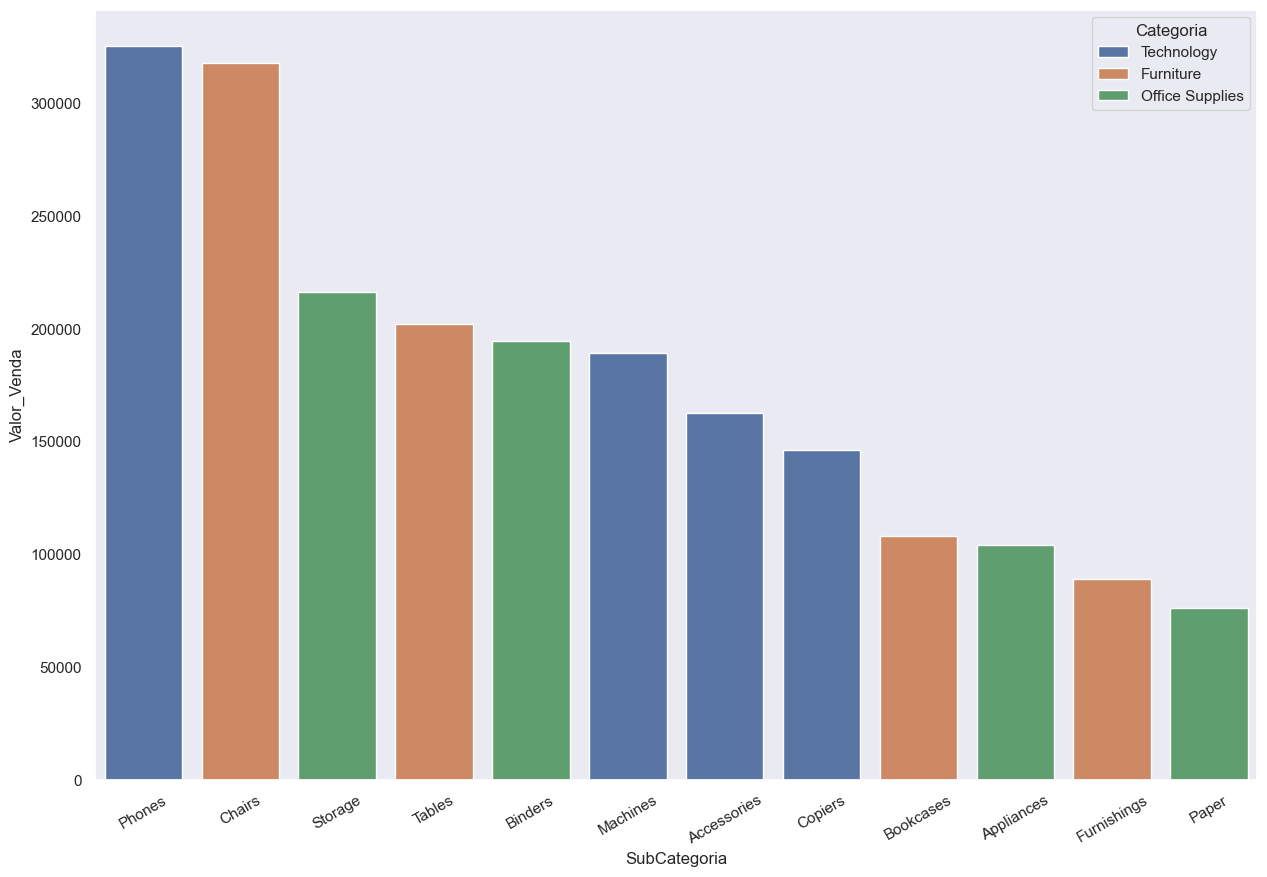

In [51]:
plt.figure(figsize = (15, 10))
plt.xticks(rotation = 30)
sns.barplot(data=top12_subcategorias, x="SubCategoria", y="Valor_Venda", hue="Categoria")